# Quick Start - CCDS Template

This notebook runs the complete flow of a typical Data Science project following the CCDS format.

## 1. Setup

In [1]:
from pathlib import Path
import sys
import os
import time

start_time = time.time()
# Pega o caminho do diretório atual onde o notebook está rodando
notebook_dir = Path(os.getcwd())

# Ajuste a quantidade de níveis para chegar na raiz do projeto
project_dir = notebook_dir.parents[0]  # Ajuste conforme sua estrutura

src_dir = project_dir / "src"
sys.path.append(str(src_dir))

## 2. Load Raw Data

In [2]:
from src.dataset import main as load_dataset

2025-09-20 00:18:22.935 | INFO     | src.config:<module>:28 - PROJ_ROOT path is: C:\Repositories\cvae-mnist


Using device: cpu


In [3]:
load_dataset()

2025-09-20 00:18:25.284 | INFO     | src.dataset:main:31 - Starting dataset processing...
Saved C:\Repositories\cvae-mnist\data\processed\mnist_train.pt with 60000 samples.
Saved C:\Repositories\cvae-mnist\data\processed\mnist_test.pt with 10000 samples.
2025-09-20 00:18:45.834 | SUCCESS  | src.dataset:main:41 - Processing dataset complete. Elapsed time: 20.55 seconds


## 3. Model Training

In [4]:
from src.modeling.train import main as train_models

In [5]:
train_models()

2025-09-20 00:18:45.899 | INFO     | src.modeling.train:main:101 - Training CVAE model...
2025-09-20 00:18:45.999 | INFO     | src.modeling.train:main:108 - Dataset loaded.
2025-09-20 00:18:46.008 | INFO     | src.modeling.train:main:113 - Model initialized.


 10%|█         | 1/10 [00:53<08:05, 53.94s/it]

2025-09-20 00:19:39.947 | INFO     | src.modeling.train:main:137 - Epoch [1/10], Loss: 147.6755


 20%|██        | 2/10 [01:48<07:16, 54.56s/it]

2025-09-20 00:20:34.945 | INFO     | src.modeling.train:main:137 - Epoch [2/10], Loss: 94.9728


 30%|███       | 3/10 [02:47<06:35, 56.46s/it]

2025-09-20 00:21:33.671 | INFO     | src.modeling.train:main:137 - Epoch [3/10], Loss: 89.7934


 40%|████      | 4/10 [03:43<05:37, 56.19s/it]

2025-09-20 00:22:29.445 | INFO     | src.modeling.train:main:137 - Epoch [4/10], Loss: 87.8240


 50%|█████     | 5/10 [04:41<04:44, 56.82s/it]

2025-09-20 00:23:27.383 | INFO     | src.modeling.train:main:137 - Epoch [5/10], Loss: 86.6553


 60%|██████    | 6/10 [05:40<03:50, 57.69s/it]

2025-09-20 00:24:26.774 | INFO     | src.modeling.train:main:137 - Epoch [6/10], Loss: 85.8468


 70%|███████   | 7/10 [06:43<02:58, 59.49s/it]

2025-09-20 00:25:29.956 | INFO     | src.modeling.train:main:137 - Epoch [7/10], Loss: 85.2330


 80%|████████  | 8/10 [07:40<01:57, 58.64s/it]

2025-09-20 00:26:26.780 | INFO     | src.modeling.train:main:137 - Epoch [8/10], Loss: 84.7294


 90%|█████████ | 9/10 [08:38<00:58, 58.49s/it]

2025-09-20 00:27:24.946 | INFO     | src.modeling.train:main:137 - Epoch [9/10], Loss: 84.2979


100%|██████████| 10/10 [09:36<00:00, 57.68s/it]

2025-09-20 00:28:22.819 | INFO     | src.modeling.train:main:137 - Epoch [10/10], Loss: 83.9925
2025-09-20 00:28:22.825 | INFO     | src.modeling.train:_save_model:31 - Saving the model.
2025-09-20 00:28:22.836 | SUCCESS  | src.modeling.train:main:145 - Training complete. Elapsed time: 576.94 seconds


## 4. Generate

In [6]:
from src.modeling.generate import main as generate_image

In [7]:
digit=7

2025-09-20 00:28:23.431 | INFO     | src.modeling.generate:main:122 - Running inference...
2025-09-20 00:28:23.431 | INFO     | src.modeling.generate:model_fn:22 - Starting model_fn to load the model.
2025-09-20 00:28:23.432 | INFO     | src.modeling.generate:model_fn:29 - Model parameters: latent_dim=100, num_classes=10, input_channels=1
2025-09-20 00:28:23.445 | INFO     | src.modeling.generate:model_fn:35 - CVAE model initialized.
2025-09-20 00:28:23.445 | INFO     | src.modeling.generate:model_fn:39 - Loading model state from: C:\Repositories\cvae-mnist\models\model.pth
2025-09-20 00:28:23.470 | INFO     | src.modeling.generate:model_fn:43 - Model state loaded successfully.
2025-09-20 00:28:23.470 | INFO     | src.modeling.generate:model_fn:49 - Model set to evaluation mode.
2025-09-20 00:28:23.471 | INFO     | src.modeling.generate:predict_fn:92 - Starting prediction with input: 7
2025-09-20 00:28:23.471 | INFO     | src.modeling.generate:predict_fn:97 - latent_dim=100, num_classe

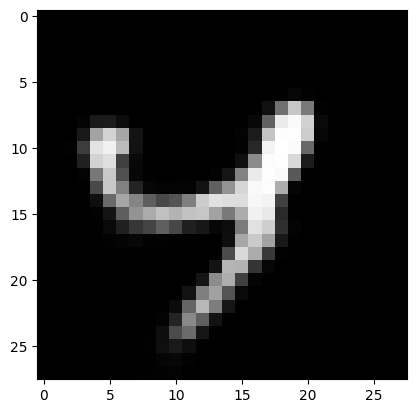

In [8]:
generate_image(digit=digit)

In [9]:
end_time = time.time()

## 5. Run Experiment

In [10]:
from src.config import mlflow, MODELS_DIR, FIGURES_DIR, CONFIG_FILE

In [11]:
mlflow.set_experiment("CVAE_MNST")

<Experiment: artifact_location='file:///C:/Repositories/cvae-mnist/mlruns/296919351382578903', creation_time=1758336855947, experiment_id='296919351382578903', last_update_time=1758336855947, lifecycle_stage='active', name='CVAE_MNST', tags={}>

In [12]:
with mlflow.start_run() as run:
    # arquivos individuais -> log_artifact
    mlflow.log_artifact(str(MODELS_DIR / "model.pth"), artifact_path="models")
    mlflow.log_artifact(str(FIGURES_DIR / f"cvae_digit{digit}.png"), artifact_path="figures")
    mlflow.log_artifact(str(CONFIG_FILE), artifact_path="config")
    mlflow.log_param("elapsed_time", end_time - start_time)